# Importing Libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Data Cleaning

In [158]:
warnings.filterwarnings('ignore') #not to display the warnings
pd.options.display.max_columns = None #to display all columns

### 1. Data Collection

In [159]:
#importing data from fraud_detection_dataset.csv file
dataset = pd.read_csv('fraud_detection_dataset.csv')
df = dataset.copy()  #copying the dataset

In [160]:
df.head() #printing the first 5 rows in the dataset

,Unnamed: 0,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,FALSE,844.26,NaN,704785.63,721.0,89.0,0.0,40.0,118.0,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810.0,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.0,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,0x0002b44ddb1476db43c868bd494422ee4c136fed,FALSE,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102.0,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,NaN,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0x0002bda54cb772d040f779e88eb453cac0daa244,faLse,246194.54,NaN,516729.30,2.0,10.0,0.0,10.0,2.0,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12.0,3.588616,NaN,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,faLse,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34.0,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,NaN,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.0,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,faLse,36.61,10707.77,NaN,4598.0,20.0,1.0,7.0,19.0,NaN,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619.0,104.318883,53.421897,0.0,-50.896986,42.0,NaN,1.235399e+05,0.0,4.0,23.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,9.000000e+04,4934.232147,0.0,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### 2. Data Inspection

In [161]:
df.shape #dimensions of the dataset

(10241, 50)

In [162]:
df.columns #names of the columns

Index(['Unnamed: 0', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time 

In [163]:
df.dtypes #type of each column

Unnamed: 0                                                int64
Address                                                  object
FLAG                                                     object
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                float64
Received Tnx                                            float64
Number of Created Contracts                             float64
Unique Received From Addresses                          float64
Unique Sent To Addresses                                float64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                            

In [164]:
df.info() # Precise summary of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            10241 non-null  int64  
 1   Address                                               10241 non-null  object 
 2   FLAG                                                  10241 non-null  object 
 3   Avg min between sent tnx                              9964 non-null   float64
 4   Avg min between received tnx                          10110 non-null  float64
 5   Time Diff between first and last (Mins)               10225 non-null  float64
 6   Sent tnx                                              9758 non-null   float64
 7   Received Tnx                                          9817 non-null   float64
 8   Number of Created Contracts                           10

### 3. Dropping first unnecessary 'Unnamed : 0' feature

In [165]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [166]:
df.shape

(10241, 49)

### 4.1 Changing the Target feature name from 'FLAG' to 'fraud_status'
### 4.2 Removing space from the feature names

In [167]:
df = df.rename(columns = {'FLAG': 'fraud_status'}) #renaming target variable name

In [168]:
df.columns = df.columns.str.strip() #Eliminating whitespace from the feature names.

In [169]:
df.columns #printing column names

Index(['Address', 'fraud_status', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time between rec tnx',

In [170]:
df.head()

,Address,fraud_status,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,FALSE,844.26,NaN,704785.63,721.0,89.0,0.0,40.0,118.0,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810.0,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.0,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,FALSE,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102.0,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,NaN,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,faLse,246194.54,NaN,516729.30,2.0,10.0,0.0,10.0,2.0,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12.0,3.588616,NaN,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,faLse,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34.0,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,NaN,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.0,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,faLse,36.61,10707.77,NaN,4598.0,20.0,1.0,7.0,19.0,NaN,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619.0,104.318883,53.421897,0.0,-50.896986,42.0,NaN,1.235399e+05,0.0,4.0,23.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,9.000000e+04,4934.232147,0.0,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### 5. Handling Duplicate Samples (rows)

In [171]:
#Checking for duplicates
if df.duplicated().any():
    print('Dataset has duplicates.')
else:
    print('No duplicates')

Dataset has duplicates.


In [172]:
df = df.drop_duplicates() #dropping duplicates

In [173]:
#Re-checking duplicates
if df.duplicated().any():
    print('Dataset has duplicates.')
else:
    print('Data frame has no duplicates')

Data frame has no duplicates


### 6. Converting 'category' feature values to lowercase

In [174]:
categorical_columns = df.select_dtypes(include = ['object']).columns

for i in categorical_columns:
    df[i] = df[i].str.lower()
    print(f"The values of {i} are")
    print(df.loc[:10, i])     #printing first 10 rows vlaues

The values of Address are
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8
1     0x0002b44ddb1476db43c868bd494422ee4c136fed
2     0x0002bda54cb772d040f779e88eb453cac0daa244
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89
5     0x000895ad78f4403ecd9468900e68d6ee506136fd
6     0x000d63fc5df52b0204374c2f5a3249779805d5d1
7     0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d
8     0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4
9     0x0012f247c9f980eea0a9ad06893bfd95c3145794
10    0x0013e58a315d2e728f11630aa40abfbdddcab304
Name: Address, dtype: object
The values of fraud_status are
0     false
1     false
2     false
3     false
4     false
5     false
6     false
7     false
8     false
9     false
10    false
Name: fraud_status, dtype: object
The values of ERC20 most sent token type are
0          cofoundit
1     livepeer token
2               none
3             raiden
4      statusnetwork
5                  0
6                  0
7               n

### 7. Binary Encoding of Target variable

In [175]:
df['fraud_status'].unique() #finding the unique values in the column


array(['false', 'n', 'f', 'true'], dtype=object)

In [176]:
replacing_value = {'false': '0', 'n' : '0', 'f' : '0', 'true' : '1'}
replacing_value

{'false': '0', 'n': '0', 'f': '0', 'true': '1'}

In [177]:
df['fraud_status'] = df['fraud_status'].replace(replacing_value) #replacing the value

In [178]:
#re-checking the column values
df['fraud_status'].unique() 

array(['0', '1'], dtype=object)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   fraud_status                                          9841 non-null   object 
 2   Avg min between sent tnx                              9572 non-null   float64
 3   Avg min between received tnx                          9718 non-null   float64
 4   Time Diff between first and last (Mins)               9825 non-null   float64
 5   Sent tnx                                              9383 non-null   float64
 6   Received Tnx                                          9436 non-null   float64
 7   Number of Created Contracts                           9617 non-null   float64
 8   Unique Received From Addresses                        9621

### 8. Converting 'str' features to 'catergory' 

In [180]:
categorical_columns = df.select_dtypes(include = ['object']) #storing 'object' dtype feature names

In [181]:
#converting all object types to 'category' type
for i in categorical_columns:
    df[i] = df[i].astype('category')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Address                                               9841 non-null   category
 1   fraud_status                                          9841 non-null   category
 2   Avg min between sent tnx                              9572 non-null   float64 
 3   Avg min between received tnx                          9718 non-null   float64 
 4   Time Diff between first and last (Mins)               9825 non-null   float64 
 5   Sent tnx                                              9383 non-null   float64 
 6   Received Tnx                                          9436 non-null   float64 
 7   Number of Created Contracts                           9617 non-null   float64 
 8   Unique Received From Addresses                  

### 9. Handling Missing Values

In [183]:
df.isnull().sum()

Address                                                    0
fraud_status                                               0
Avg min between sent tnx                                 269
Avg min between received tnx                             123
Time Diff between first and last (Mins)                   16
Sent tnx                                                 458
Received Tnx                                             405
Number of Created Contracts                              224
Unique Received From Addresses                           220
Unique Sent To Addresses                                  98
min value received                                       441
max value received                                       324
avg val received                                          87
min val sent                                             223
max val sent                                             143
avg val sent                                             254
min value sent to contra

In [184]:
# Storing numerical feature columns names
numerical_columns = df.select_dtypes(include = ['int', 'float']).columns
numerical_columns

Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx

### 9.1 Filling numerical null values with mean

In [185]:
for i in numerical_columns:
    df[i].fillna(df[i].mean(), inplace = True)

In [186]:
#re-checking the null values of the numerical columns
df.isnull().sum()

Address                                                   0
fraud_status                                              0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

### 9.2 Filling Categorical values with Most frequent

In [187]:
for i in categorical_columns:
    df[i].fillna(df[i].mode().iloc[0], inplace = True)

In [188]:
#re-checking the null values of the categorical columns
for i in categorical_columns:
    print(f"Number of null values of {i} : {df[i].isnull().sum()}")

Number of null values of Address : 0
Number of null values of fraud_status : 0
Number of null values of ERC20 most sent token type : 0
Number of null values of ERC20_most_rec_token_type : 0


### 10. Set Proper Precision

In [189]:
df[numerical_columns] #Values doesn't have proper precision

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,844.26,8011.073909,7.047856e+05,721.0,89.0,0.0,40.0,118.0,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810.0,865.691093,586.466675,0.0,-279.224419,265.000000,3.558854e+07,3.560317e+07,0.000000,30.000000,54.000000,0.000000,58.000000,0.0,0.0,0.0,0.0,0.000000,1.500000e+07,2.655861e+05,0.000000,1.683100e+07,2.717799e+05,0.0,0.0,0.0,39.000000,57.000000
1,12709.07,2958.440000,1.218217e+06,94.0,8.0,0.0,5.0,14.0,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102.0,3.087297,3.085478,0.0,-0.001819,8.000000,4.034283e+02,2.260809e+00,0.000000,1.000000,5.000000,0.000000,7.000000,0.0,0.0,0.0,0.0,0.000000,3.650000e+02,5.763262e+01,12119.441259,2.260809e+00,2.260809e+00,0.0,0.0,0.0,1.000000,7.000000
2,246194.54,8011.073909,5.167293e+05,2.0,10.0,0.0,10.0,2.0,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12.0,3.588616,9033.871977,0.0,0.000441,8.000000,5.215121e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000,4.428198e+02,6.518901e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,8.000000
3,10219.60,15785.090000,3.975559e+05,25.0,9.0,0.0,7.0,13.0,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34.0,1750.045862,895.399559,0.0,-854.646303,14.000000,1.711105e+04,1.141223e+04,113.161758,2.000000,11.000000,0.000000,11.000000,0.0,0.0,0.0,0.0,0.000000,1.141223e+04,1.555550e+03,100.000000,9.029231e+03,3.804077e+03,0.0,0.0,0.0,1.000000,11.000000
4,36.61,10707.770000,2.181936e+05,4598.0,20.0,1.0,7.0,19.0,43.643659,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619.0,104.318883,53.421897,0.0,-50.896986,42.000000,1.354298e+08,1.235399e+05,0.000000,4.000000,23.000000,0.000000,4.884778,0.0,0.0,0.0,0.0,496.982072,9.000000e+04,4.934232e+03,0.000000,4.500000e+04,1.372666e+04,0.0,0.0,0.0,6.000000,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,12635.10,631.390000,5.874848e+04,4.0,13.0,0.0,11.0,4.0,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17.0,36.665461,36.673777,0.0,0.008316,2.000000,1.337000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,1.337000e+00,6.685000e-01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
9837,0.00,8011.073909,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,1.337000e+01,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,496.982072,1.337000e+01,1.337000e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.375324,1.000000
9838,2499.44,2189.290000,2.616019e+05,67.0,43.0,0.0,31.0,44.0,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110.0,61.785995,53.070252,0.0,-8.715743,

In [190]:
for i in numerical_columns: #rounding the values to 0.02
    df[i] = df[i].round(2)

In [191]:
df[numerical_columns]

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,844.26,8011.07,704785.63,721.0,89.0,0.0,40.0,118.0,0.00,45.81,6.59,0.00,31.22,1.20,0.0,0.0,0.0,810.0,865.69,586.47,0.0,-279.22,265.0,3.558854e+07,35603169.52,0.00,30.00,54.00,0.0,58.00,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.15,0.00,16830998.35,271779.92,0.0,0.0,0.0,39.00,57.00
1,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.00,2.61,0.39,0.00,1.80,0.03,0.0,0.0,0.0,102.0,3.09,3.09,0.0,-0.00,8.0,4.034300e+02,2.26,0.00,1.00,5.00,0.0,7.00,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.63,12119.44,2.26,2.26,0.0,0.0,0.0,1.00,7.00
2,246194.54,8011.07,516729.30,2.0,10.0,0.0,10.0,2.0,0.11,1.17,0.36,0.05,3.54,1.79,0.0,0.0,0.0,12.0,3.59,9033.87,0.0,0.00,8.0,5.215100e+02,0.00,0.00,0.00,7.00,0.0,8.00,0.0,0.0,0.0,0.0,0.00,4.428200e+02,65.19,0.00,0.00,0.00,0.0,0.0,0.0,0.00,8.00
3,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.00,500.00,99.49,0.00,450.00,70.00,0.0,0.0,0.0,34.0,1750.05,895.40,0.0,-854.65,14.0,1.711105e+04,11412.23,113.16,2.00,11.00,0.0,11.00,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.55,100.00,9029.23,3804.08,0.0,0.0,0.0,1.00,11.00
4,36.61,10707.77,218193.63,4598.0,20.0,1.0,7.0,19.0,43.64,12.80,2.67,0.00,9.00,0.02,0.0,0.0,0.0,4619.0,104.32,53.42,0.0,-50.90,42.0,1.354298e+08,123539.93,0.00,4.00,23.00,0.0,4.88,0.0,0.0,0.0,0.0,496.98,9.000000e+04,4934.23,0.00,45000.00,13726.66,0.0,0.0,0.0,6.00,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,12635.10,631.39,58748.48,4.0,13.0,0.0,11.0,4.0,0.00,12.00,2.82,0.47,12.20,9.17,0.0,0.0,0.0,17.0,36.67,36.67,0.0,0.01,2.0,1.340000e+00,0.00,0.00,0.00,2.00,0.0,2.00,0.0,0.0,0.0,0.0,0.00,1.340000e+00,0.67,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.00
9837,0.00,8011.07,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.0,1.337000e+01,0.00,0.00,0.00,1.00,0.0,1.00,0.0,0.0,0.0,0.0,496.98,1.337000e+01,13.37,0.00,0.00,0.00,0.0,0.0,0.0,1.38,1.00
9838,2499.44,2189.29,261601.88,67.0,43.0,0.0,31.0,44.0,0.00,21.31,1.23,0.00,9.50,0.92,0.0,0.0,0.0,110.0,61.79,53.07,0.0,-8.72,5.0,1.503470e+03,0.00,0.00,0.00,5.00,0.0,5.00,0.0,0.0,0.0,0.0,0.00,1.500000e+03,300.69,0.00,0.00,0.00,0.0,0.0,0.0,0.00,5.00
9839,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.50,0.50,0.50,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.00,9033.87,0.0,0.50,37.0,1.354298e+08,14371063.60,113.16,4.93,7.71,0.0,4.88,0.0,0.0,0.0,0.0,496.98,1.273324e+08,4511342.88,12119.44,13257393.60,6600937.86,0.0,0.0,0.0,1.38,4.92


# Exploratory Data Analysis

In [192]:
df.head()

,Address,fraud_status,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,8011.07,704785.63,721.0,89.0,0.0,40.0,118.0,0.00,45.81,6.59,0.00,31.22,1.20,0.0,0.0,0.0,810.0,865.69,586.47,0.0,-279.22,265.0,3.558854e+07,35603169.52,0.00,30.0,54.0,0.0,58.00,0.0,0.0,0.0,0.0,0.00,15000000.00,265586.15,0.00,16830998.35,271779.92,0.0,0.0,0.0,39.0,57.0,cofoundit,numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.00,2.61,0.39,0.00,1.80,0.03,0.0,0.0,0.0,102.0,3.09,3.09,0.0,-0.00,8.0,4.034300e+02,2.26,0.00,1.0,5.0,0.0,7.00,0.0,0.0,0.0,0.0,0.00,365.00,57.63,12119.44,2.26,2.26,0.0,0.0,0.0,1.0,7.0,livepeer token,livepeer token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,8011.07,516729.30,2.0,10.0,0.0,10.0,2.0,0.11,1.17,0.36,0.05,3.54,1.79,0.0,0.0,0.0,12.0,3.59,9033.87,0.0,0.00,8.0,5.215100e+02,0.00,0.00,0.0,7.0,0.0,8.00,0.0,0.0,0.0,0.0,0.00,442.82,65.19,0.00,0.00,0.00,0.0,0.0,0.0,0.0,8.0,none,xenon
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.00,500.00,99.49,0.00,450.00,70.00,0.0,0.0,0.0,34.0,1750.05,895.40,0.0,-854.65,14.0,1.711105e+04,11412.23,113.16,2.0,11.0,0.0,11.00,0.0,0.0,0.0,0.0,0.00,11412.23,1555.55,100.00,9029.23,3804.08,0.0,0.0,0.0,1.0,11.0,raiden,xenon
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,218193.63,4598.0,20.0,1.0,7.0,19.0,43.64,12.80,2.67,0.00,9.00,0.02,0.0,0.0,0.0,4619.0,104.32,53.42,0.0,-50.90,42.0,1.354298e+08,123539.93,0.00,4.0,23.0,0.0,4.88,0.0,0.0,0.0,0.0,496.98,90000.00,4934.23,0.00,45000.00,13726.66,0.0,0.0,0.0,6.0,27.0,statusnetwork,eos


### 1. Summary Statistics

In [193]:
df.describe() #count,  mean, std, min, 25%, 50%, 75%, max of the dataset

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.0,9841.0,9841.0,9841.0,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.0,9841.0,9841.0,9841.000000,9841.000000
mean,5052.155811,8011.073860,2.181936e+05,115.482963,162.370272,3.813783,29.784534,26.044703,43.643413,535.525889,100.677988,4.844527,314.651120,43.773198,0.000003,0.000008,0.000005,281.904512,1.064175e+04,9.033872e+03,0.000008,1.555435e+03,37.000610,1.354298e+08,1.437106e+07,113.161577,4.930265,7.706527,0.003048,4.884146,0.0,0.0,0.0,0.0,496.981982,1.273324e+08,4.511343e+06,1.211944e+04,1.325739e+07,6.600938e+06,0.0,0.0,0.0,1.375964,4.922788
std,21043.520543,22964.898738,3.226726e+05,742.063055,913.982613,141.444499,281.005101,263.803876,321.667727,13008.156515,2884.748084,138.598623,6626.722964,205.374338,0.000225,0.000552,0.000302,1317.647334,3.582944e+05,2.227484e+05,0.000552,2.423637e+05,428.173212,1.008476e+10,1.129571e+09,5864.773859,91.943938,78.273265,0.062068,16.075472,0.0,0.0,0.0,0.0,16155.245156,1.008375e+10,2.048994e+08,1.008208e+06,1.129108e+09,5.660115e+08,0.0,0.0,0.0,6.293834,15.852656
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.170200e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.430000,0.000000,0.180000,0.100000,0.000000,0.000000,0.000000,4.000000,4.500000e-01,3.110000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,19.790000,571.520000,4.709132e+04,3.000000,5.000000,0.000000,2.000000,2.000000,0.100000,7.000000,1.780000,0.060000,5.050000,1.820000,0.000000,0.000000,0.000000,10.000000,1.795000e+01,3.700000e+01,0.000000,0.000000e+00,1.000000,1.340000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,7.200000e-01,6.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,1047.430000,5885.430000,3.030365e+05,15.000000,36.000000,0.000000,6.000000,3.000000,4.790000,81.320000,25.090000,1.000000,67.350000,28.990000,0.000000,0.000000,0.000000,75.000000,1.010000e+02,1.088900e+02,0.000000,6.0

In [194]:
#Variance of the dataset
df.var()

Avg min between sent tnx                                4.428298e+08
Avg min between received tnx                            5.273866e+08
Time Diff between first and last (Mins)                 1.041176e+11
Sent tnx                                                5.506576e+05
Received Tnx                                            8.353642e+05
Number of Created Contracts                             2.000655e+04
Unique Received From Addresses                          7.896387e+04
Unique Sent To Addresses                                6.959248e+04
min value received                                      1.034701e+05
max value received                                      1.692121e+08
avg val received                                        8.321772e+06
min val sent                                            1.920958e+04
max val sent                                            4.391346e+07
avg val sent                                            4.217862e+04
min value sent to contract        

In [195]:
#Correlation of the dataset
df.corr()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
Avg min between sent tnx,1.000000,0.063004,0.212471,-0.031242,-0.034775,-0.006202,-0.016037,-0.017769,-0.016001,-0.007215,-0.004676,-0.004080,-0.005750,0.003880,-0.000193,0.001113,0.000727,-0.042822,-0.006527,-0.008766,0.001113,-0.001498,-0.012187,-0.002540,-0.002116,-0.004403,-0.008177,-0.001391,-0.010613,0.045199,NaN,NaN,NaN,NaN,0.003120,-0.002448,-0.003085,-0.001669,-0.002028,-0.001973,NaN,NaN,NaN,-0.000784,0.045544
Avg min between received tnx,0.063004,1.000000,0.300448,-0.039367,-0.052445,-0.008418,-0.029988,-0.025768,-0.044036,-0.011377,-0.009141,-0.008615,-0.011935,-0.042145,-0.003939,-0.003160,-0.004069,-0.059379,-0.009359,-0.012855,-0.003160,-0.002241,-0.019966,-0.003582,-0.003853,-0.006084,-0.012810,-0.015627,-0.013458,-0.012958,NaN,NaN,NaN,NaN,-0.008104,-0.003512,-0.005573,-0.003733,-0.003694,-0.003724,NaN,NaN,NaN,-0.019733,-0.015885
Time Diff between first and last (Mins),0.212471,0.300448,1.000000,0.143717,0.144310,-0.003859,0.040923,0.071179,-0.081495,-0.002249,-0.013798,-0.012862,0.013355,-0.048449,0.001742,0.036676,0.027564,0.186795,0.011406,0.020137,0.036676,0.003132,0.071850,0.045875,-0.004943,-0.008265,0.035404,0.077540,0.019037,0.302046,NaN,NaN,NaN,NaN,-0.010175,0.045744,0.048179,-0.006733,-0.006145,-0.006713,NaN,NaN,NaN,0.244720,0.310879
Sent tnx,-0.031242,-0.039367,0.143717,1.000000,0.194823,0.327211,0.127894,0.650614,0.026824,0.101779,0.143120,-0.004809,0.226562,0.030786,0.030140,0.012683,0.022743,0.697450,0.233053,0.080274,0.012683,-0.128589,0.378812,0.006257,0.001034,-0.002921,0.288410,0.293353,-0.007389,0.206343,NaN,NaN,NaN,NaN,-0.003667,0.004202,0.008262,-0.000221,0.000340,-0.000059,NaN,NaN,NaN,0.078776,0.216230
Received Tnx,-0.034775,-0.052445,0.144310,0.194823,1.000000,-0.003523,0.624071,0.169168,-0.021307,0.227449,-0.001601,0.096389,0.099275,0.088501,0.021271,0.008684,0.015855,0.771744,0.135035,0.281497,0.008684,0.160246,0.118313,0.016543,-0.000452,0.067782,0.051595,0.138171,0.278920,0.194350,NaN,NaN,NaN,NaN,-0.004563,0.015739,0.019023,-0.001925,-0.000751,-0.000940,NaN,NaN,NaN,0.044164,0.196164
Number of Created Contracts,-0.006202,-0.008418,-0.003859,0.327211,-0.003523,1.000000,-0.002272,0.084578,-0.001206,-0.000793,-0.000504,-0.000931,0.141959,-0.001129,-0.000269,-0.000228,-0.000287,0.232004,0.024875,-0.000940,-0.000228,-0.037923,0.249493,0.002073,0.001148,-0.000351,0.124112,0.190656,-0.000945,0.029746,NaN,NaN,NaN,NaN,-0.000822,0.000909,0.002021,-0.000108,0.000138,-0.000088,NaN,NaN,NaN,0.006224,0.030121
Unique Received From Addresses,-0.016037,-0.029988,0.040923,0.127894,0.624071,-0.002272,1.000000,0.166948,-0.012666,0.186752,-0.001283,0.002781,0.050791,0.071069,0.057356,0.023095,0.042518,0.530479,0.030245,0.207520,0.023095,0.153914,0.061436,0.002470,0.000075,0.123950,0.053686,0.088199,0.255100,0.150513,NaN,NaN,NaN,NaN,-0.002054,0.001739,0.003812,-0.001071,-0.000263,-0.000584,NaN,NaN,NaN,0.041437,0.156624
Unique Sent To Addresses,-0

### 2. Dimensionalilty Reduction of Categorical Features

In [196]:
#checking for categorical column with redundant values
for i in categorical_columns:
    print(f"{i} has {len(df[i].unique())}")

Address has 9816
fraud_status has 2
ERC20 most sent token type has 304
ERC20_most_rec_token_type has 466


In [197]:
#dropping columns that have more than 5 unique values
for i in categorical_columns:
    if len(df[i].unique()) > 5:
        df.drop(columns = i, inplace = True)
        

In [198]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   fraud_status                                          9841 non-null   category
 1   Avg min between sent tnx                              9841 non-null   float64 
 2   Avg min between received tnx                          9841 non-null   float64 
 3   Time Diff between first and last (Mins)               9841 non-null   float64 
 4   Sent tnx                                              9841 non-null   float64 
 5   Received Tnx                                          9841 non-null   float64 
 6   Number of Created Contracts                           9841 non-null   float64 
 7   Unique Received From Addresses                        9841 non-null   float64 
 8   Unique Sent To Addresses                        

### 3. Univariate Analysis of Categorical Feature(Target Variable)

In [199]:
labels = ['Non-fraud', 'fraud'] 
target_variable = 'fraud_status'  #assign fraud_status to target variable
count_of_target_variable = df[target_variable].value_counts()

In [200]:
for i, j in enumerate(count_of_target_variable):
    print(f"{labels[i]} : {j}")

Non-fraud : 7662
fraud : 2179


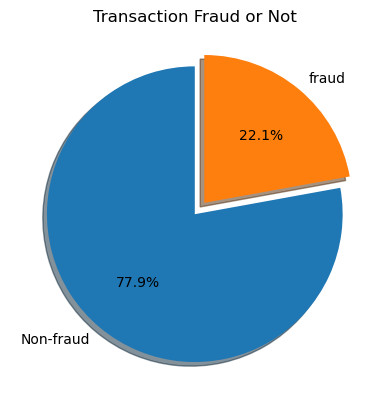

In [201]:
fig, ax = plt.subplots()
ax.pie(count_of_target_variable, labels = labels, autopct = '%1.1f%%', explode = (0, 0.1), shadow = True, startangle = 90)
plt.title('Transaction Fraud or Not')
plt.show()

### 4. Univariate Analysis of Numerical Features

In [202]:
variance = df.var() #Finding variance of the each column
variance

Avg min between sent tnx                                4.428298e+08
Avg min between received tnx                            5.273866e+08
Time Diff between first and last (Mins)                 1.041176e+11
Sent tnx                                                5.506576e+05
Received Tnx                                            8.353642e+05
Number of Created Contracts                             2.000655e+04
Unique Received From Addresses                          7.896387e+04
Unique Sent To Addresses                                6.959248e+04
min value received                                      1.034701e+05
max value received                                      1.692121e+08
avg val received                                        8.321772e+06
min val sent                                            1.920958e+04
max val sent                                            4.391346e+07
avg val sent                                            4.217862e+04
min value sent to contract        

In [203]:
df_d = df.copy()

In [204]:
#dropping the features with 0 Variance
for i in range(len(variance)):
    if variance[i] == 0:
        print(f"Dropping the column '{numerical_columns[i]}' because of 0 variance")
        df_d.drop(columns = numerical_columns[i], inplace = True)
    

Dropping the column 'ERC20 avg time between sent tnx' because of 0 variance
Dropping the column 'ERC20 avg time between rec tnx' because of 0 variance
Dropping the column 'ERC20 avg time between rec 2 tnx' because of 0 variance
Dropping the column 'ERC20 avg time between contract tnx' because of 0 variance
Dropping the column 'ERC20 min val sent contract' because of 0 variance
Dropping the column 'ERC20 max val sent contract' because of 0 variance
Dropping the column 'ERC20 avg val sent contract' because of 0 variance


In [205]:
df_d.shape

(9841, 39)

In [206]:
#updating numerical_columns variable
numerical_columns = df_d.select_dtypes(include = ['int', 'float']).columns
len(numerical_columns)

38

In [207]:
variance = df_d.var() #Finding variance of the each column
variance

Avg min between sent tnx                                4.428298e+08
Avg min between received tnx                            5.273866e+08
Time Diff between first and last (Mins)                 1.041176e+11
Sent tnx                                                5.506576e+05
Received Tnx                                            8.353642e+05
Number of Created Contracts                             2.000655e+04
Unique Received From Addresses                          7.896387e+04
Unique Sent To Addresses                                6.959248e+04
min value received                                      1.034701e+05
max value received                                      1.692121e+08
avg val received                                        8.321772e+06
min val sent                                            1.920958e+04
max val sent                                            4.391346e+07
avg val sent                                            4.217862e+04
min value sent to contract        

In [208]:
df = df_d.copy()
df.corr()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
Avg min between sent tnx,1.000000,0.063004,0.212471,-0.031242,-0.034775,-0.006202,-0.016037,-0.017769,-0.016001,-0.007215,-0.004676,-0.004080,-0.005750,0.003880,-0.000193,0.001113,0.000727,-0.042822,-0.006527,-0.008766,0.001113,-0.001498,-0.012187,-0.002540,-0.002116,-0.004403,-0.008177,-0.001391,-0.010613,0.045199,0.003120,-0.002448,-0.003085,-0.001669,-0.002028,-0.001973,-0.000784,0.045544
Avg min between received tnx,0.063004,1.000000,0.300448,-0.039367,-0.052445,-0.008418,-0.029988,-0.025768,-0.044036,-0.011377,-0.009141,-0.008615,-0.011935,-0.042145,-0.003939,-0.003160,-0.004069,-0.059379,-0.009359,-0.012855,-0.003160,-0.002241,-0.019966,-0.003582,-0.003853,-0.006084,-0.012810,-0.015627,-0.013458,-0.012958,-0.008104,-0.003512,-0.005573,-0.003733,-0.003694,-0.003724,-0.019733,-0.015885
Time Diff between first and last (Mins),0.212471,0.300448,1.000000,0.143717,0.144310,-0.003859,0.040923,0.071179,-0.081495,-0.002249,-0.013798,-0.012862,0.013355,-0.048449,0.001742,0.036676,0.027564,0.186795,0.011406,0.020137,0.036676,0.003132,0.071850,0.045875,-0.004943,-0.008265,0.035404,0.077540,0.019037,0.302046,-0.010175,0.045744,0.048179,-0.006733,-0.006145,-0.006713,0.244720,0.310879
Sent tnx,-0.031242,-0.039367,0.143717,1.000000,0.194823,0.327211,0.127894,0.650614,0.026824,0.101779,0.143120,-0.004809,0.226562,0.030786,0.030140,0.012683,0.022743,0.697450,0.233053,0.080274,0.012683,-0.128589,0.378812,0.006257,0.001034,-0.002921,0.288410,0.293353,-0.007389,0.206343,-0.003667,0.004202,0.008262,-0.000221,0.000340,-0.000059,0.078776,0.216230
Received Tnx,-0.034775,-0.052445,0.144310,0.194823,1.000000,-0.003523,0.624071,0.169168,-0.021307,0.227449,-0.001601,0.096389,0.099275,0.088501,0.021271,0.008684,0.015855,0.771744,0.135035,0.281497,0.008684,0.160246,0.118313,0.016543,-0.000452,0.067782,0.051595,0.138171,0.278920,0.194350,-0.004563,0.015739,0.019023,-0.001925,-0.000751,-0.000940,0.044164,0.196164
Number of Created Contracts,-0.006202,-0.008418,-0.003859,0.327211,-0.003523,1.000000,-0.002272,0.084578,-0.001206,-0.000793,-0.000504,-0.000931,0.141959,-0.001129,-0.000269,-0.000228,-0.000287,0.232004,0.024875,-0.000940,-0.000228,-0.037923,0.249493,0.002073,0.001148,-0.000351,0.124112,0.190656,-0.000945,0.029746,-0.000822,0.000909,0.002021,-0.000108,0.000138,-0.000088,0.006224,0.030121
Unique Received From Addresses,-0.016037,-0.029988,0.040923,0.127894,0.624071,-0.002272,1.000000,0.166948,-0.012666,0.186752,-0.001283,0.002781,0.050791,0.071069,0.057356,0.023095,0.042518,0.530479,0.030245,0.207520,0.023095,0.153914,0.061436,0.002470,0.000075,0.123950,0.053686,0.088199,0.255100,0.150513,-0.002054,0.001739,0.003812,-0.001071,-0.000263,-0.000584,0.041437,0.156624
Unique Sent To Addresses,-0.017769,-0.025768,0.071179,0.650614,0.169168,0.084578,0.166948,1.000000,0.071553,0.147554,0.207387,-0.003179,0.196088,0.026493,0.023174,0.010262,0.017858,0.499879,0.163386,0.107464,0.010262,-0.113471,0.147621,0.005581,-0.000015,-0.001852,0.119008,0.176613,-0.004849,0.230428,-0.002349,0.003591,0.005192,-0.000969,-0.000441,-0.000817,0.083578,0.236317
min value received,-0.016001,-0.044036,-0.081495,0.026824,-0.

### 5. Handling Outliers

In [209]:
#for each numerical column
for _ in range(10):
    for col in numerical_columns:
        q1 = df[col].quantile(0.25) #finding the first quantile
        q3 = df[col].quantile(0.75) #finding the second quantile
        IQR = q3 - q1 #Inter quatile range
        upperWhisker = (q3 + 1.5*IQR) #calculating upper whisker

        lowerWhisker = (q1 - 1.5*IQR) #calculating lower whisker

        df.loc[df[col] >= upperWhisker, col] = np.median(df[col]) #handling lower outliers
        df.loc[df[col] <= lowerWhisker, col] = np.median(df[col]) #handling upper outliers

In [210]:
df.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.0,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.0,9841.0,9841.0,9841.000000,9841.000000,9841.000000,9841.0,9841.0,9841.000000,9841.000000,9841.0,9841.0,9841.0,9841.000000,9841.0,9841.000000,9841.0,9841.000000,9841.000000,9841.0,9841.0,9841.0,9841.0,9841.000000
mean,11.563026,337.657927,28390.244961,2.083528,3.628595,0.0,1.728889,1.472310,0.062340,4.670587,1.236656,0.034836,3.302554,1.197908,0.0,0.0,0.0,7.229753,11.169408,24.416261,0.0,0.0,0.659486,0.733743,0.0,0.0,0.0,0.656945,0.0,1.315098,0.0,0.412598,0.380998,0.0,0.0,0.0,0.0,1.333011
std,10.239619,323.680529,26370.853823,1.324923,2.262713,0.0,0.716152,0.967915,0.053221,3.544180,0.833771,0.033395,2.778193,0.973645,0.0,0.0,0.0,4.011740,9.532844,19.184688,0.0,0.0,0.640276,0.705416,0.0,0.0,0.0,0.645170,0.0,1.663382,0.0,0.420169,0.388112,0.0,0.0,0.0,0.0,1.689445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,317.020000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.430000,0.000000,0.180000,0.100000,0.0,0.0,0.0,4.000000,0.450000,3.110000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,19.790000,571.520000,47091.320000,3.000000,5.000000,0.0,2.000000,2.000000,0.100000,7.000000,1.780000,0.060000,5.050000,1.820000,0.0,0.0,0.0,10.000000,17.950000,37.000000,0.0,0.0,1.000000,1.340000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.720000,0.650000,0.0,0.0,0.0,0.0,1.000000
75%,19.790000,571.520000,47091.320000,3.000000,5.000000,0.0,2.000000,2.000000,0.100000,7.000000,1.780000,0.060000,5.050000,1.820000,0.0,0.0,0.0,10.000000,17.950000,37.000000,0.0,0.0,1.000000,1.340000,0.0,0.0,0.0,1.000000,0.0,2.000000,0.0,0.720000,0.650000,0.0,0.0,0.0,0.0,2.000000
max,49.240000,1428.660000,117151.620000,5.000000,10.000000,0.0,3.000000,3.000000,0.240000,15.920000,3.800000,0.140000,12.230000,4.390000,0.0,0.0,0.0,18.000000,44.140000,87.740000,0.0,0.0,2.000000,3.350000,0.0,0.0,0.0,2.000000,0.0,4.880000,0.0,1.790000,1.620000,0.0,0.0,0.0,0.0,4.920000


### 6. Bivariate Analysis of the Numerical features

In [211]:
#checking the correlation of the features
correlation = df.corr()
correlation


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
Avg min between sent tnx,1.000000,0.130301,0.127241,0.673308,0.162432,NaN,0.178975,0.652236,0.176611,0.323297,0.261522,0.081950,0.448762,0.352814,NaN,NaN,NaN,0.272270,0.503897,0.274456,NaN,NaN,-0.138470,-0.099131,NaN,NaN,NaN,-0.135506,NaN,-0.178249,NaN,-0.134188,-0.132064,NaN,NaN,NaN,NaN,-0.178408
Avg min between received tnx,0.130301,1.000000,0.643077,0.155646,0.652939,NaN,0.487641,-0.095005,-0.242657,0.049463,-0.010095,-0.216360,0.013190,-0.067741,NaN,NaN,NaN,0.622153,0.061140,0.173674,NaN,NaN,0.329037,0.274852,NaN,NaN,NaN,0.341922,NaN,0.101417,NaN,0.239001,0.229806,NaN,NaN,NaN,NaN,0.084700
Time Diff between first and last (Mins),0.127241,0.643077,1.000000,0.150234,0.620642,NaN,0.433859,-0.090950,-0.252389,0.065947,-0.010349,-0.262466,-0.017029,-0.102504,NaN,NaN,NaN,0.620867,0.047305,0.163970,NaN,NaN,0.349057,0.275636,NaN,NaN,NaN,0.356191,NaN,0.089704,NaN,0.235520,0.217049,NaN,NaN,NaN,NaN,0.073368
Sent tnx,0.673308,0.155646,0.150234,1.000000,0.206284,NaN,0.228010,0.762485,0.292550,0.335820,0.304424,0.233328,0.538191,0.463946,NaN,NaN,NaN,0.338842,0.570145,0.216643,NaN,NaN,-0.286327,-0.231841,NaN,NaN,NaN,-0.276655,NaN,-0.267761,NaN,-0.268118,-0.260452,NaN,NaN,NaN,NaN,-0.270935
Received Tnx,0.162432,0.652939,0.620642,0.206284,1.000000,NaN,0.589964,-0.015670,-0.229540,0.184928,0.097662,-0.167665,0.141074,0.050524,NaN,NaN,NaN,0.795985,0.179780,0.260464,NaN,NaN,0.313095,0.260525,NaN,NaN,NaN,0.320724,NaN,0.095132,NaN,0.239403,0.222003,NaN,NaN,NaN,NaN,0.080163
Number of Created Contracts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unique Received From Addresses,0.178975,0.487641,0.433859,0.228010,0.589964,NaN,1.000000,0.118918,-0.075475,0.232490,0.183280,-0.036790,0.173656,0.122966,NaN,NaN,NaN,0.573142,0.195747,0.312716,NaN,NaN,0.162347,0.100270,NaN,NaN,NaN,0.169523,NaN,-0.019680,NaN,0.064116,0.057361,NaN,NaN,NaN,NaN,-0.015728
Unique Sent To Addresses,0.652236,-0.095005,-0.090950,0.762485,-0.015670,NaN,0.118918,1.000000,0.346649,0.364155,0.359740,0.284075,0.553374,0.511744,NaN,NaN,NaN,0.113091,0.555277,0.236760,NaN,NaN,-0.334902,-0.275190,NaN,NaN,NaN,-0.332230,NaN,-0.294878,NaN,-0.304972,-0.296294,NaN,NaN,NaN,NaN,-0.287616
min value received,0.176611,-0.242657,-0.252389,0.292550,-0.229540,NaN,-0.075475,0.346649,1.000000,0.159315,0.274313,0.490885,0.282433,0.335427,NaN,NaN,NaN,-0.200385,0.237000,0.014036,NaN,NaN,-0.440188,-0.398910,NaN,NaN,NaN,-0.424599,NaN,-0.296404,NaN,-0.402270,-0.384009,NaN,NaN,NaN,NaN,-0.288655
max value received,0.323297,0.049463,0.065947,0.335820,0.184928,NaN,0.232490,0.364155,0.159315,1.000000,0.729401,0.087970,0.662999,0.521495,NaN,NaN,NaN,0.230017,0.608641,0.592803,NaN,NaN,-0.176959,-0.152283,NaN,NaN,NaN,-0.171215,NaN,-0.216868,NaN,-0.176176,-0.177318,NaN,NaN,NaN,NaN,-0.216675


In [212]:

correlatedCols= correlation.columns[(correlation.abs() > 0.01).any()]  #finding the values that have correlation greater than 0.01

In [213]:
df = df[correlatedCols] #dropping the columns that have low correlation

In [220]:
df['fraud_status'] = df_d['fraud_status']

In [221]:
#dropping columns with high correlation
drop_columns = ['total transactions (including tnx to create contract', 'ERC20 max val rec', 'ERC20 avg val rec', 'Unique Received From Addresses', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'ERC20 uniq rec addr','min value received']

In [215]:
df.drop(drop_columns, axis = 1, inplace = True)

In [216]:
correlation = df.corr() #correlation of new dataset
correlation

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,max value received,avg val received,min val sent,max val sent,avg val sent,total Ether sent,total ether received,Total ERC20 tnxs,ERC20 total Ether received,ERC20 uniq rec contract addr,ERC20 uniq rec token name
Avg min between sent tnx,1.000000,0.130301,0.127241,0.673308,0.162432,0.323297,0.261522,0.081950,0.448762,0.352814,0.503897,0.274456,-0.138470,-0.099131,-0.178249,-0.178408
Avg min between received tnx,0.130301,1.000000,0.643077,0.155646,0.652939,0.049463,-0.010095,-0.216360,0.013190,-0.067741,0.061140,0.173674,0.329037,0.274852,0.101417,0.084700
Time Diff between first and last (Mins),0.127241,0.643077,1.000000,0.150234,0.620642,0.065947,-0.010349,-0.262466,-0.017029,-0.102504,0.047305,0.163970,0.349057,0.275636,0.089704,0.073368
Sent tnx,0.673308,0.155646,0.150234,1.000000,0.206284,0.335820,0.304424,0.233328,0.538191,0.463946,0.570145,0.216643,-0.286327,-0.231841,-0.267761,-0.270935
Received Tnx,0.162432,0.652939,0.620642,0.206284,1.000000,0.184928,0.097662,-0.167665,0.141074,0.050524,0.179780,0.260464,0.313095,0.260525,0.095132,0.080163
max value received,0.323297,0.049463,0.065947,0.335820,0.184928,1.000000,0.729401,0.087970,0.662999,0.521495,0.608641,0.592803,-0.176959,-0.152283,-0.216868,-0.216675
avg val received,0.261522,-0.010095,-0.010349,0.304424,0.097662,0.729401,1.000000,0.145179,0.583962,0.622977,0.490209,0.464200,-0.237010,-0.213447,-0.265534,-0.263608
min val sent,0.081950,-0.216360,-0.262466,0.233328,-0.167665,0.087970,0.145179,1.000000,0.283533,0.362642,0.220979,-0.024578,-0.421751,-0.409201,-0.242069,-0.234362
max val sent,0.448762,0.013190,-0.017029,0.538191,0.141074,0.662999,0.583962,0.283533,1.000000,0.733006,0.723449,0.397833,-0.237611,-0.175630,-0.210538,-0.217765
avg val sent,0.352814,-0.067741,-0.102504,0.463946,0.050524,0.521495,0.622977,0.362642,0.733006,1.000000,0.588307,0.299129,-0.278490,-0.211767,-0.227809,-0.235032


### 7. Data Visualization of Bi variate Analysis of numerical features with their correlations

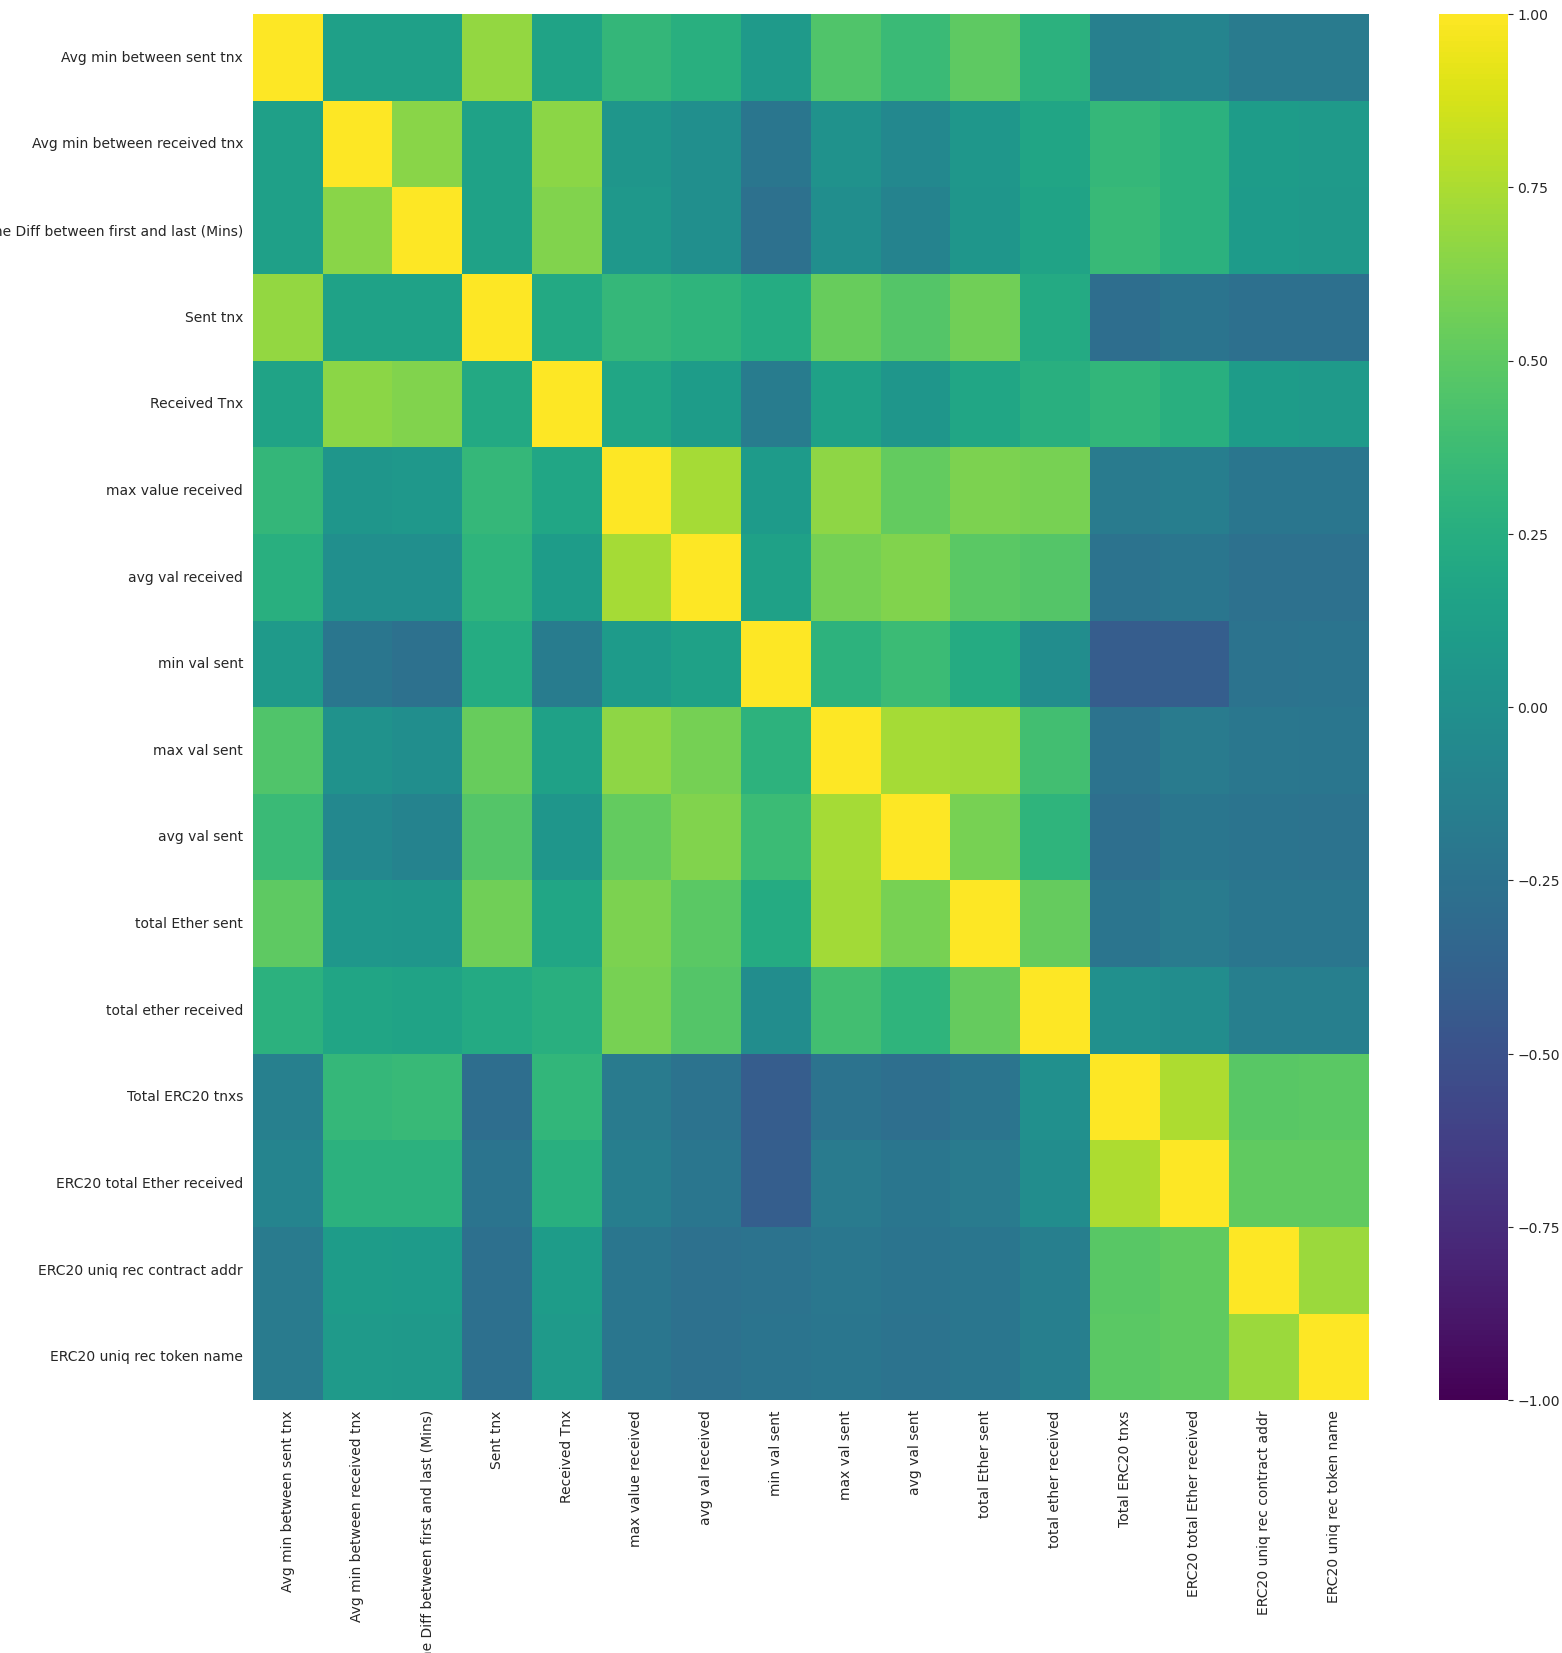

In [145]:
#plotting a heatmap with the correlation
with sns.axes_style('dark'):
    figure, axes = plt.subplots(figsize = (18, 18))
    sns.heatmap(correlation, cmap = 'viridis', vmin = -1, vmax = 1)

### 8. Data visulization of Target Variables vs independent Variables

In [234]:

x_axis = df['fraud_status'].unique() #finding unique values in the target variables


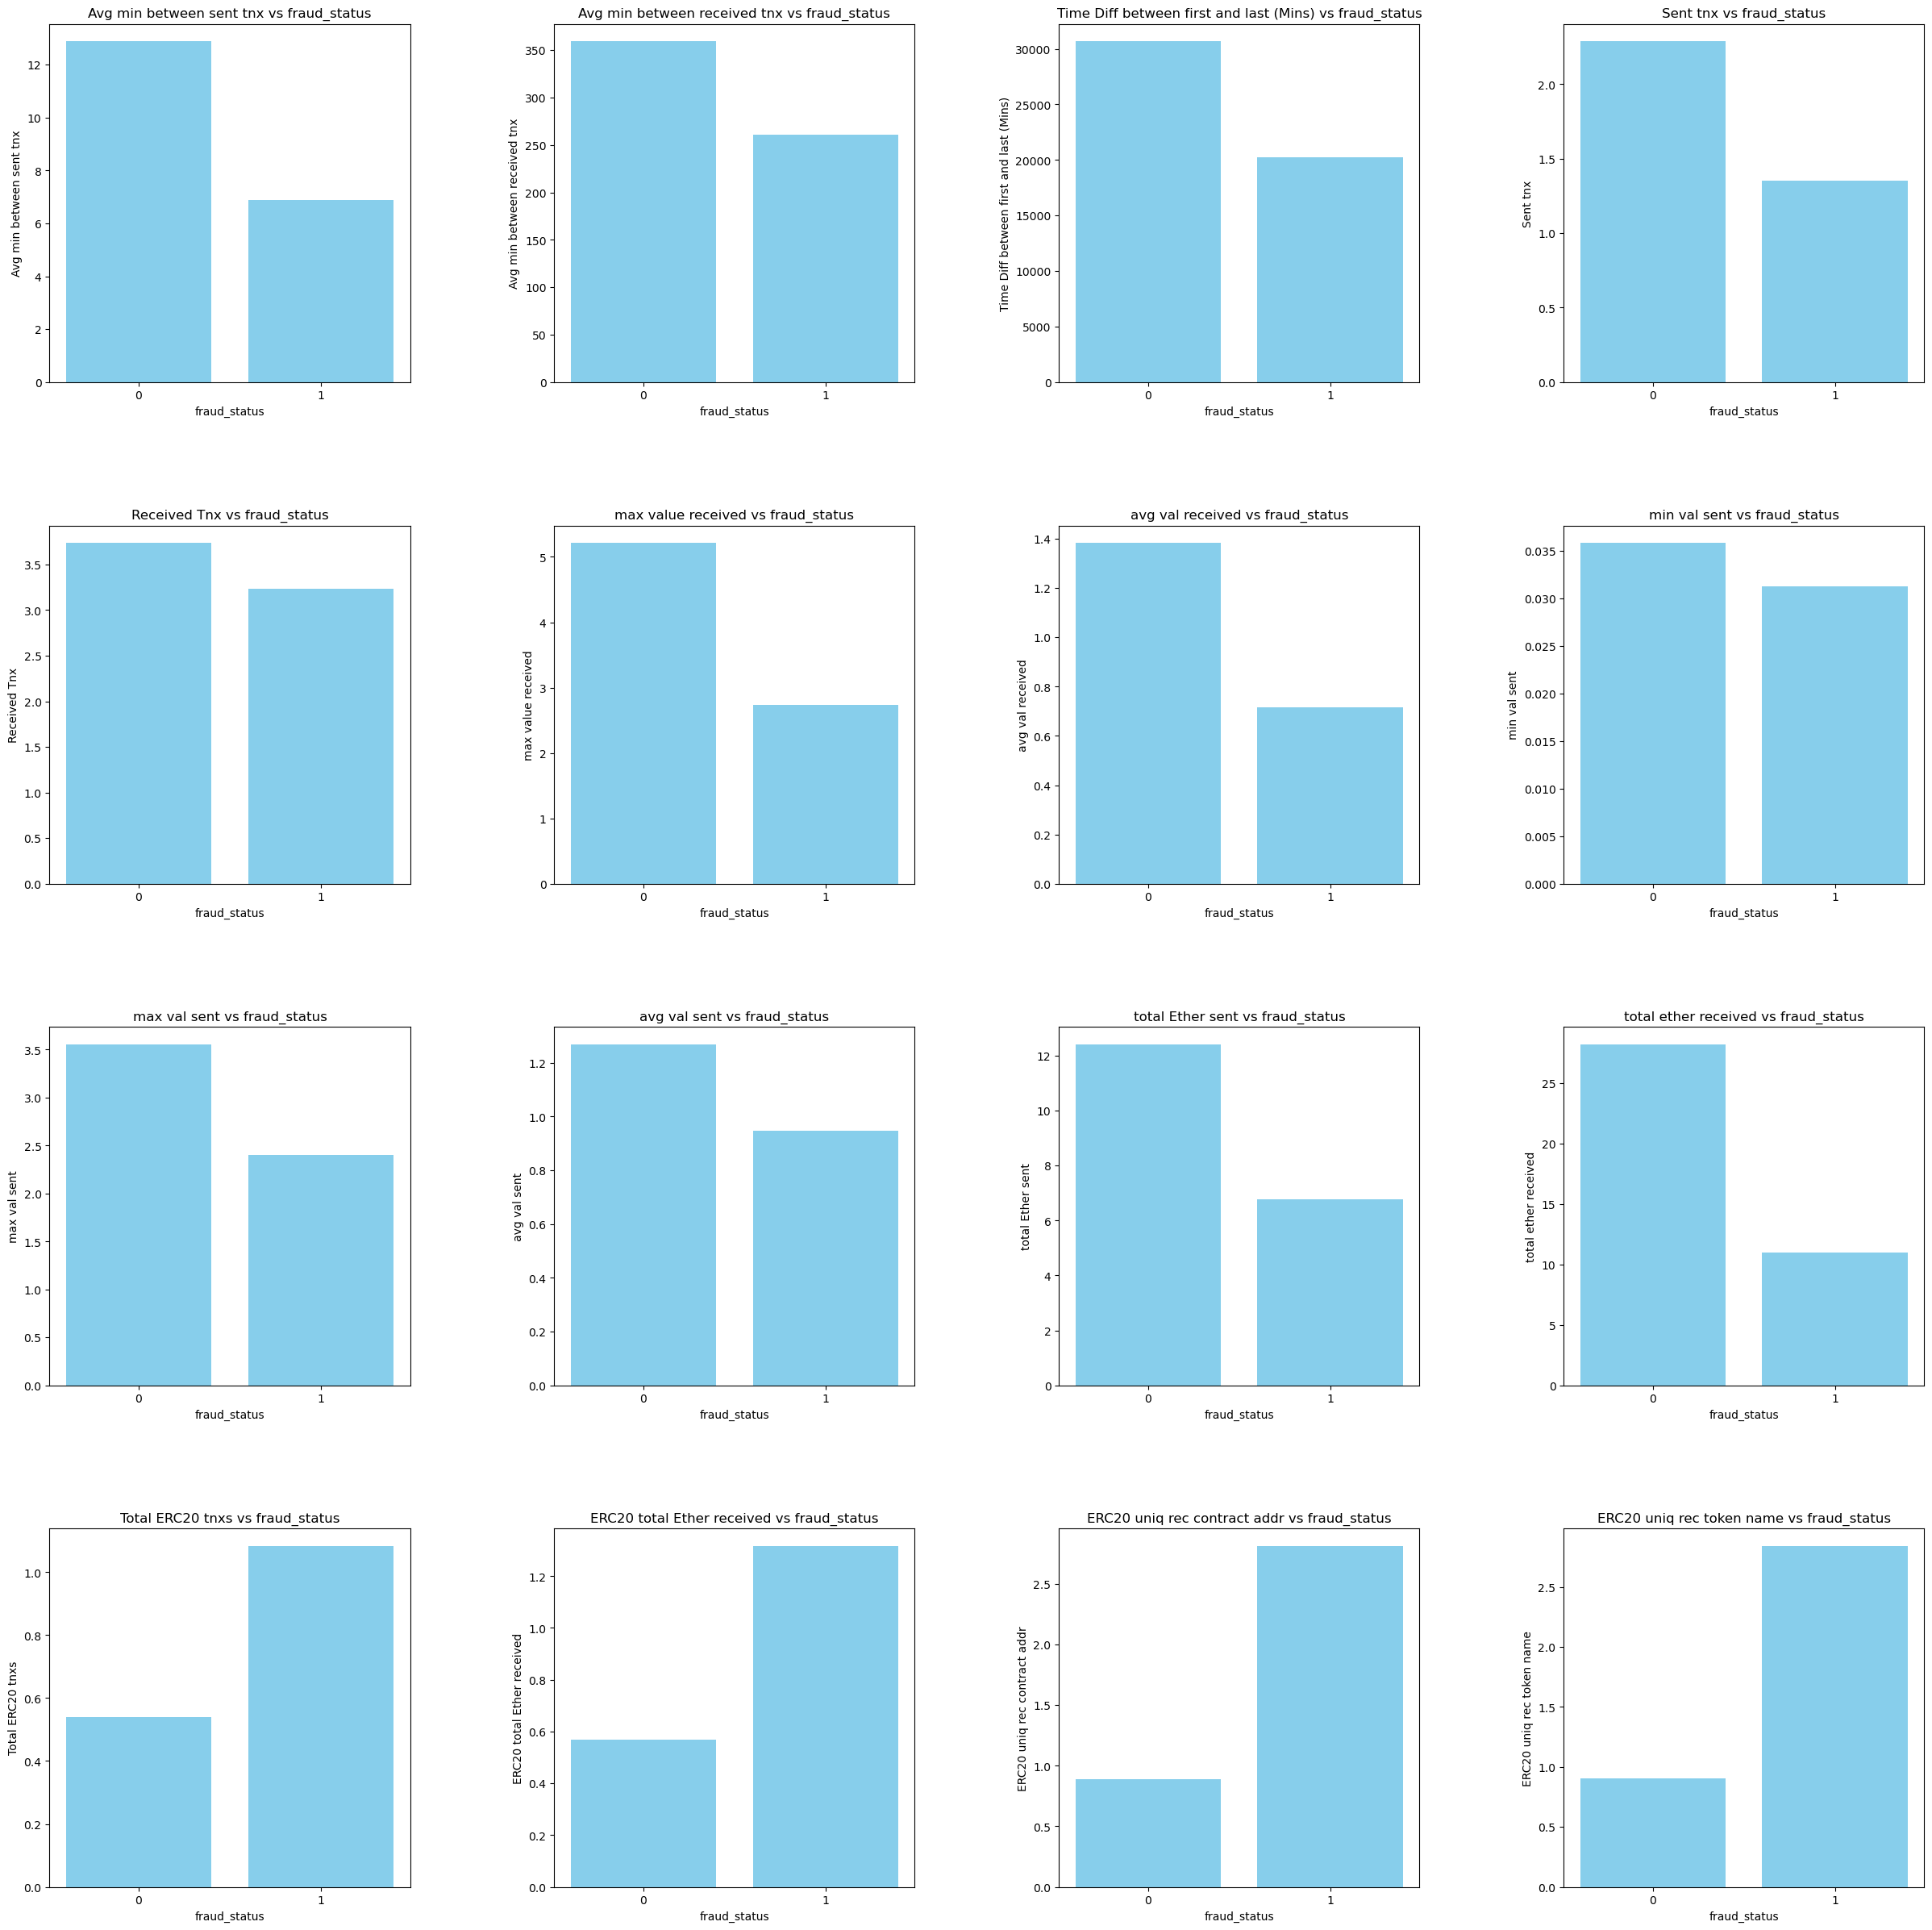

In [242]:
#plotting subplots of Target Variables vs Dependent Variables
fig, axes = plt.subplots(4, 4, figsize = (30, 30))
for i in range(4):
    for j in range(4):
        ind = 4*i + j
        val = df.groupby(df['fraud_status'])[numerical_columns[ind]].mean()
        axes[i, j].bar(x_axis, val, color = 'skyblue')
        axes[i, j].set_title(f"{numerical_columns[ind]} vs fraud_status")
        axes[i, j].set_xlabel(f'fraud_status')
        axes[i, j].set_ylabel(f"{numerical_columns[ind]}")
plt.subplots_adjust(hspace=0.4, wspace=0.4)

        
plt.show()


### 9. Normalization

In [224]:
numerical_columns = df.select_dtypes(include = ['int', 'float']).columns #finding new numerical column names

In [225]:
print(len(numerical_columns))

16


In [148]:
for i in numerical_columns:
    min = df[i].min()
    max = df[i].max()
    df[i] = (df[i] - min)/(max - min)
    

In [151]:
df.head() #normalised values

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,max value received,avg val received,min val sent,max val sent,avg val sent,total Ether sent,total ether received,Total ERC20 tnxs,ERC20 total Ether received,ERC20 uniq rec contract addr,ERC20 uniq rec token name
0,0.401909,0.400039,0.401969,0.6,0.5,0.439698,0.468421,0.000000,0.412919,0.273349,0.406661,0.421700,0.5,0.4,0.204918,0.203252
1,0.401909,0.400039,0.401969,0.6,0.8,0.163945,0.102632,0.000000,0.147179,0.006834,0.070005,0.035218,0.5,0.4,0.204918,0.203252
2,0.401909,0.400039,0.401969,0.4,1.0,0.073492,0.094737,0.357143,0.289452,0.407745,0.081332,0.421700,0.5,0.4,0.204918,0.203252
3,0.401909,0.400039,0.401969,0.6,0.9,0.439698,0.468421,0.000000,0.412919,0.414579,0.406661,0.421700,0.5,0.4,0.204918,0.203252
4,0.743501,0.400039,0.401969,0.6,0.5,0.804020,0.702632,0.000000,0.735895,0.004556,0.406661,0.608844,0.5,0.4,1.000000,0.203252


### 10. Data visualization of Univariate Analysis 

<Axes: title={'center': 'Data visualization of Univariate Analysis '}>

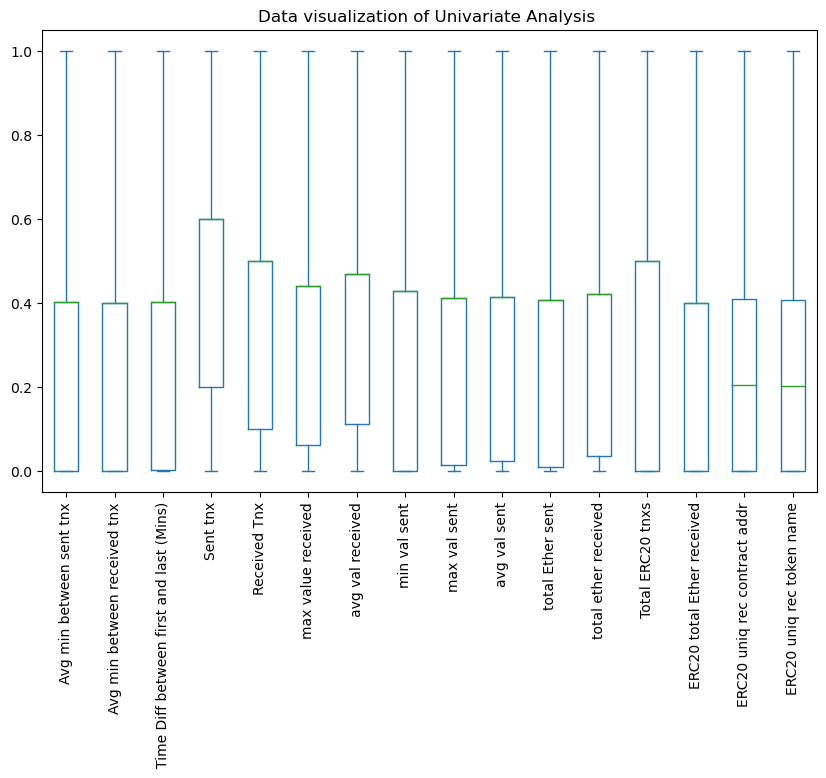

In [156]:

df.plot.box(rot = 90, figsize = (10, 6), title = 'Data visualization of Univariate Analysis ')